In [1]:
import pandas as pd
import numpy as np

In [3]:
df_C = pd.read_csv('HCV_NS5B_Curated.csv')
df_C.head()

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,...,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,IC50,=,1.4,nM,8.853872,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,354.37,4.93,75.35,0,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,IC50,=,1.7,nM,8.769551,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1146957,...,Bioorg. Med. Chem. Lett.,2006,16.0,8.0,2205.0,419.54,2.37,107.45,0,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,IC50,=,3.0,nM,8.522879,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,336.38,4.72,75.35,0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,IC50,=,4.8,nM,8.318759,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,335.40,5.51,73.32,1,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,IC50,=,6.0,nM,8.221849,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,510.62,6.79,71.77,2,Active


In [18]:
selection = ['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE']
df_1 = df_C[selection]
df_1 = df_1[df_1.STANDARD_VALUE.notna()]
df_1

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0
...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.0
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.0
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.0
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.0


In [19]:
df_1.isnull().any()

CMPD_CHEMBLID       False
CANONICAL_SMILES    False
STANDARD_VALUE      False
dtype: bool

In [20]:
L2 = []
for value in df_1.STANDARD_VALUE.values:
    if float(value) < 1000.0:
        L2.append('Active')
    elif float(value) >10000.0:
        L2.append('Inactive')
    else:
        L2.append('Intermediate')

df_1['bio_class'] = L2
df_1.head()

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,bio_class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0,Active


In [21]:
df_1.to_csv('Bioactivity_class.csv', index=False)

In [22]:
norm = []
for value in df_2.STANDARD_VALUE.values:
    if float(value)> 100000000:
        value = 100000000
    mol = (-np.log10(float(value)*(10**-9)))
    norm.append(mol)
df_1['pIC50'] = norm
df_1.head()

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,bio_class,pIC50
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,Active,8.853872
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7,Active,8.769551
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,Active,8.522879
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,Active,8.318759
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0,Active,8.221849


In [23]:
df_1.to_csv('Bioactivity_class_pIC50.csv')

In [24]:
selection = ['CANONICAL_SMILES', 'CMPD_CHEMBLID']
df_3 = df_1[selection]
df_3.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [25]:
import zipfile
with zipfile.ZipFile("padel.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [26]:
!type molecule.smi

OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4	CHEMBL179256
CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccccc3N2)O)C(C)(C)C	CHEMBL204350
OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4	CHEMBL179257
OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4	CHEMBL178784
CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4)c5ccc(cc15)C(=O)O	CHEMBL369319
CNC(=O)c1c(oc2ccc(c(F)c12)c3cc(cc(F)c3C)C(=O)NC4(COC4)c5ncccn5)c6ccc(F)cc6	CHEMBL3651437
CS(=O)(=O)N1CCN(CC1)C(=O)Cn2c(c3ccc(Cl)cc3)c(C4CCCCC4)c5ccc(cc25)C(=O)O	CHEMBL191196
OC(=O)[C@H](Cc1c[nH]c2ccc(NC(=O)C(=O)O)cc12)NC(=O)c3ccc4c(c3)nc(c5cocc5)n4C6CCCCC6	CHEMBL173466
OC(=O)c1ccc2c(C3CCCCC3)c(c4ccc(Cl)cc4)n(CC(=O)NCC5CC5)c2c1	CHEMBL363199
CNS(=O)(=O)Nc1ccc2N=C(NS(=O)(=O)c2c1)C3=C(O)c4ccccc4N(NC5CCC5)C3=O	CHEMBL210693
COc1ccc(cc1)c2c(C3CCCCC3)c4ccc(cc4n2CC(=O)N5CCC(CC5)N(C)C)C(=O)O	CHEMBL190428
OC(=O)c1ccc2c(C3CCCCC3)c(c4cocc4)n(CC(=O)N5CCC(CC5)N6CCC6)c2c1	CHEMBL362957
CCN(CC)C1CCN(CC1)C(=O)Cn2c(c3ccc(OC)cc3)c(C4CCCCC4)c5ccc(cc25)C(=O)O	CHEMBL190098
CCN(CC)CC1CN(CCO

CC(C)CCN1C(=O)C(=C(O)c2cc(NC(=O)C3CCCC3)ccc12)C4=NS(=O)(=O)c5ccccc5N4	CHEMBL439333
OC(=O)c1ccc2c(c1)nc(c3ccc(OCC(c4ccccc4)c5ccccc5)cc3)n2C6CCCCC6	CHEMBL206624
OC(=O)[C@H](Cc1ccccc1)N(Cc2cccc(Br)c2)C(=O)c3ccc(Cl)cc3	CHEMBL26052
OC(=O)\C(=C\c1cccc(n1)c2ccccc2Cl)\NC(=O)c3ccccc3	CHEMBL425915
Cc1ccc(C#N)c2c3CCC(CC=C)(C(=O)O)c3[nH]c12	CHEMBL381166
OC(=O)[C@H](Cc1ccccc1)N(Cc2cccnc2)C(=O)c3ccc(Cl)cc3Cl	CHEMBL283833
OC(=O)C(=O)CC(=O)c1cccc(NC(=O)c2ccccc2)c1	CHEMBL366966
Clc1ccc(CC2SC(=S)N(NS(=O)(=O)c3ccccc3)C2=O)cc1Cl	CHEMBL372777
COc1ccc(cc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)O	CHEMBL213078
COC(=O)N(CC(=O)O)C(=O)c1c(OC)ccc2c(c(OC)ccc12)C(F)(F)F	CHEMBL83762
CC(C)C[C@]1(C[C@@H]([C@@H](N1C(=O)c2ccccc2)c3cccs3)C(=O)O)C(=O)O	CHEMBL361428
OC(=O)c1nc(nc(O)c1O)c2cc3ccccc3s2	CHEMBL203738
Oc1ccc(NC(=O)\C(=C\c2ccc(Oc3ccccc3Br)cc2)\NC(=O)c4ccccc4)cc1	CHEMBL193596
Cc1cccc(c1)\C(=C\C(=O)C(=O)O)\O	CHEMBL370131
COc1ccc(cc1OC)[C@H](C)NC(=O)c2ccc3c(c2)nc(c4ccccn4)n3C5CCCCC5	CHEMBL173638
OC(=O)\C(=C\c1oc(cc1)c2ccc(F)cc

In [27]:
! cat molecule.smi | wc -l

578


In [28]:
!cat padel.sh 
!padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [37]:
df_5 = pd.read_csv('descriptors_output.csv')
df_5.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL204350,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL210693,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL179256,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL178784,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL179257,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_5 = df_5.drop(columns='Name')
df_5.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_6 = pd.concat([df_5, df_2.pIC50], axis=1)
df_6.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.769551
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849


In [40]:
df_6.to_csv('Descriptors_pIC50.csv', index=False)

In [41]:
df = pd.read_csv('Descriptors_pIC50.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.769551
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849


In [42]:
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

In [43]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold

In [44]:
def variance_threshold_selector(data, threshold=(0.0015)):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

x = variance_threshold_selector(X) #keeps as dataframe

In [45]:
x

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,...,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP838,PubchemFP839,PubchemFP860,PubchemFP863
0,1,1,0,1,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
574,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
575,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
576,1,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.13)

In [47]:
x_test.shape

(76, 548)

In [48]:
np.any(np.isnan(x_train))

False

In [49]:
import numpy as np

model = RandomForestRegressor(n_estimators=580)
model.fit(x_train, Y_train)
r2 = model.score(x_test, Y_test)
r2

0.7362849240327052

In [50]:
Y_pred = model.predict(x_test)

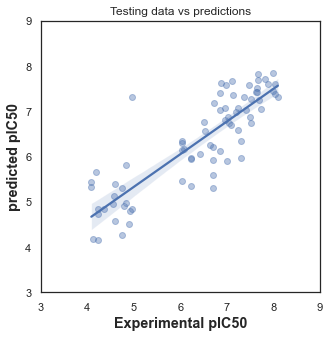

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3,9)
ax.set_ylim(3,9)
ax.set_title('Testing data vs predictions')
ax.figure.set_size_inches(5, 5)
plt.show()

# Linear regression

In [60]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [61]:
#Cost function
def cost(x, y, w, b, lambda_):
    
    x = np.array(x)
    m = x.shape[0]
    y = np.array(y).reshape(m)
    w = np.array(w).reshape(n)
    
    f_x = np.dot(x, w) + b                #array shape (m,)
    cost = (lambda_/(2*m))*(sum(w**2)) + (sum((f_x - y)**2)) / (2*m)      #scalar
    return cost

def gradient(x, y, w, b, lambda_):
    
    x = np.array(x)
    m = x.shape[0]
    y = np.array(y).reshape(m)
    w = np.array(w).reshape(n)
    
    f_x = np.dot(x, w) + b  #array shape(m,)
    
    d_dw = (w*lambda_/m) +  (np.dot((f_x - y), x) / m)
    d_db = sum(f_x - y) / m
    return d_dw, d_db

def descent(x, y, w_in, b_in, num_itr, lambda_, alpha, cost, gradient):
    
    w = w_in
    b = b_in
    
    cost_history = np.zeros(num_itr)
    w_history = np.zeros([num_itr, n])
    b_history = np.zeros(num_itr)
    
    for i in range(num_itr):
        d_dw, d_db = gradient(x, y, w, b, lambda_)
        
        w = w - alpha * d_dw
        b = b - alpha * d_db
        
        cost_history[i] = cost(x, y, w, b, lambda_)
        b_history[i] = b
        w_history[i] = w
        
        if i%(num_itr/10) == 0:
            print(f'Iteration = {i}, cost = {cost_history[i]}, b = {b_history[i]}')
    return cost_history, w_history, b_history

In [124]:
x = x_train
y = Y_train
n = x.shape[1]
w_in = np.zeros(n)
b_in = 0
alpha = 0.01
num_itr = 20000
lambda_ = 4
cost_history, w_history, b_history = descent(x, y, w_in, b_in, num_itr, lambda_, alpha, cost, gradient)
w_final = w_history[-1]
cost_final = cost_history[-1]
b_final = b_history[-1]

Iteration = 0, cost = 1.4359096842923895, b = 0.0629454089691942
Iteration = 2000, cost = 0.1722129087747949, b = 0.24604763604988428
Iteration = 4000, cost = 0.1570585731388907, b = 0.32476093687837454
Iteration = 6000, cost = 0.15191757494327118, b = 0.3909739048043939
Iteration = 8000, cost = 0.14961328529534673, b = 0.4514328692160183
Iteration = 10000, cost = 0.1483948756070713, b = 0.5085086949391251
Iteration = 12000, cost = 0.14766918996036915, b = 0.5633304952661545
Iteration = 14000, cost = 0.1471938782051163, b = 0.6165038016620461
Iteration = 16000, cost = 0.14685635586625478, b = 0.6683780743792622
Iteration = 18000, cost = 0.14659935293763637, b = 0.7191673394882989


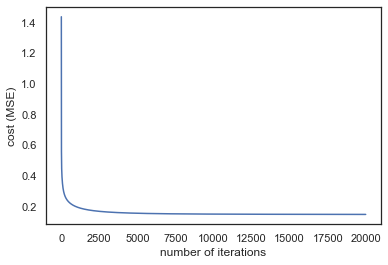

In [125]:

plt.plot(cost_history)
plt.xlabel('number of iterations')
plt.ylabel('cost (MSE)')
plt.show()

In [126]:
x = np.array(x_test)
y_pred = np.dot(x, w_final) + b_final

In [127]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)
r_squared(Y_test, y_pred)

0.7216952821845068

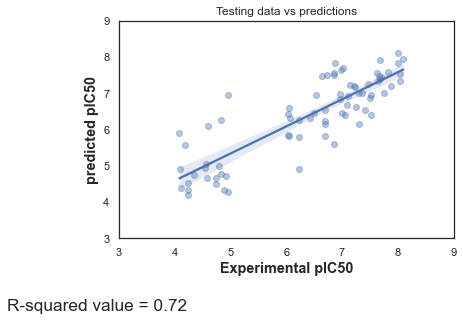

In [128]:
ax = sns.regplot(x=Y_test,y=y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3,9)
ax.set_ylim(3,9)
ax.set_title('Testing data vs predictions')
#ax.figure.set_size_inches(5, 5)
#plt.show()
#plt.plot(x_line, y_line, c= 'r', linestyle='dashed')
plt.text(1, 1, f'R-squared value = {round(r_squared(Y_test, y_pred),2)}', size='x-large')
plt.show()

In [116]:
r_test_history = []
r_train_history = []
cost_h = []
for i in range(0, 25, 4):
    cost_history, w_history, b_history = descent(x, y, w_in, b_in, num_itr, i, alpha, cost, gradient)
    w_final = w_history[-1]
    cost_final = cost_history[-1]
    b_final = b_history[-1]
    x_test = np.array(x_test)
    y_pred = np.dot(x_test, w_final) + b_final
    r_test_history.append(r_squared(Y_test, y_pred))
    y_pred = np.dot(x_train, w_final) + b_final
    r_train_history.append(r_squared(Y_train, y_pred))
    cost_h.append(cost_final)
    clear_output()
    print(f' lambda {i} done')
r_test_history

 lambda 24 done


[0.7185162576926309,
 0.7216952821845068,
 0.7135638304218226,
 0.7051023133197659,
 0.697570960904961,
 0.6909588223614604,
 0.6851112177169953]

In [129]:
norm_test = r_test_history/np.array(r_test_history).max()
norm_train = r_train_history/np.array(r_train_history).max()

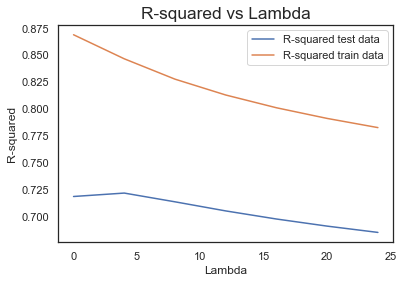

In [136]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 25, 4),r_test_history, label = 'R-squared test data')
plt.plot(range(0, 25, 4),r_train_history, label = 'R-squared train data')

plt.xlabel('Lambda')
plt.ylabel('R-squared')
plt.title('R-squared vs Lambda', size = 'x-large')
plt.legend()
plt.show()

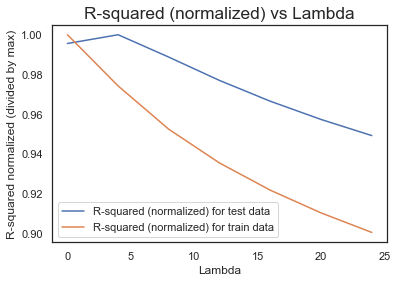

In [135]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 25, 4),norm_test, label = 'R-squared (normalized) for test data')
plt.plot(range(0, 25, 4),norm_train, label = 'R-squared (normalized) for train data')

plt.xlabel('Lambda')
plt.ylabel('R-squared normalized (divided by max)')
plt.title('R-squared (normalized) vs Lambda', size = 'x-large')
plt.legend()
plt.show()

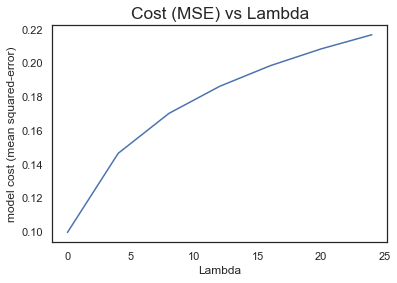

In [137]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 25, 4), cost_h)
plt.xlabel('Lambda')
plt.ylabel('model cost (mean squared-error)')
plt.title('Cost (MSE) vs Lambda', size = 'x-large')
plt.show()